# Initialization

Interactive use of the `scqubits` library from a jupyter notebook starts with importing the `scqubits` library. Additional imports, e.g.,  `numpy` and the QuTiP library are optional.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import scqubits as qubit
import scqubits.utils.plotting as plot

import numpy as np
from qutip import *

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


# Flux Qubit

$H_\text{flux}=(n_{i}-n_{gi})4(E_\text{C})_{ij}(n_{j}-n_{gj})
                -E_{J}\cos\phi_{1}-E_{J}\cos\phi_{2}-\alpha E_{J}\cos(2\pi f + \phi_{1} - \phi_{2}), \; i,j\in\{1,2\}$

In [65]:
# parameters for the flux qubit
RATIO = 35.0
ALPHA = 0.6

flux_qubit = qubit.FluxQubit(
    EJ1 = 1.0, 
    EJ2 = 1.0, 
    EJ3 = ALPHA*1.0, 
    ECJ1 = 1.0/RATIO, 
    ECJ2 = 1.0/RATIO, 
    ECJ3 = 1.0/ALPHA/RATIO, 
    ECg1 = 50.0/RATIO, 
    ECg2 = 50.0/RATIO, 
    ng1 = 0.0, 
    ng2 = 0.0, 
    flux = 0.5, 
    ncut = 10,
)

In [66]:
flux_qubit

flux qubit without disorder in the two large junctions
 ———— PARAMETERS ————
Cg1	: 0.01
CJ2	: 0.5
EJ3	: 21.0
EJ2	: 35.0
ncut	: 10
ECJ2	: 1.0
EJ1	: 35.0
ng1	: 0.0
ECmat	: [[0.7154213  0.26497085]
 [0.26497085 0.7154213 ]]
CJ3	: 0.3
truncated_dim	: None
Cmat	: [[ 0.81 -0.3 ]
 [-0.3   0.81]]
ECJ1	: 1.0
ng2	: 0.0
Cg2	: 0.01
ECg2	: 50.0
CJ1	: 0.5
ECJ3	: 1.6666666666666667
ECg1	: 50.0
flux	: 0.5
Hilbert space dimension	: 441

### Potential energy for flux qubit

(<Figure size 288x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f279be3fbe0>)

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


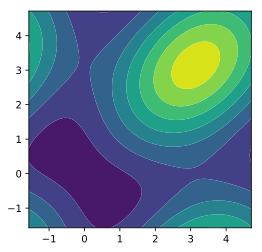

In [62]:
flux_qubit.plot_potential()

### Eigenenergies

In [45]:
evals = flux_qubit.eigenvals()

In [46]:
evals

array([-74.77862571, -58.97627062, -58.95641986, -44.00828305,
       -43.66065485, -43.49377414])


[====================] 100% Done.


/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


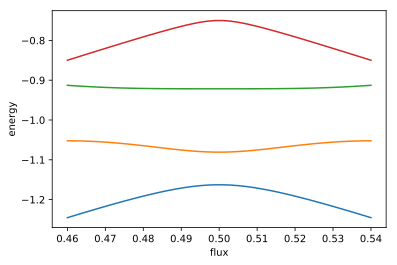

CPU times: user 9.58 s, sys: 21.6 s, total: 31.1 s
Wall time: 3.09 s


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f279bf722e8>)

In [47]:
flux_list = np.linspace(.46, .54, 40)
%time flux_qubit.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False, normalize=flux_qubit.EJ1)

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f279bbe3208>)

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


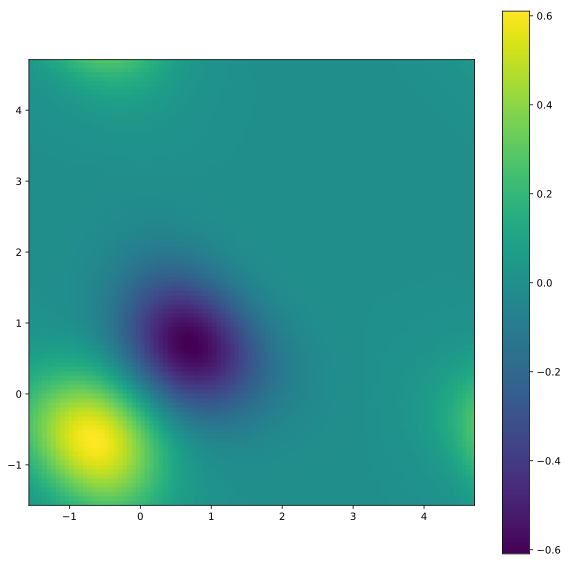

In [70]:
esys = flux_qubit.eigensys()
flux_qubit.plot_wavefunction(esys, which=1, mode='real')